<class 'numpy.ndarray'>


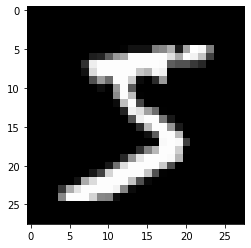

In [4]:
from mnist import MNIST
import numpy as np 
import matplotlib.pyplot as plt
mndata = MNIST('./sample')

x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(type(x_train))
plt.imshow(np.array(x_train[0]).reshape(28,28), cmap='gray')

In [5]:
x_train =x_train/255.0
x_test = x_test/255.0
# print(x_train, x_test)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.shape)
print(x_train)

(60000, 28, 28, 1) (10000, 28, 28, 1)
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn_export import export
logistic = LogisticRegression()
logistic.fit(x_train.reshape(-1,784), y_train)
y_pred = logistic.predict(x_test.reshape(-1,784))
# print(accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



c:\conda\envs\Tensorflow_RTX_Ampere\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train.reshape(-1,784), y_train)
y_pred = knn.predict(x_test.reshape(-1,784))
# print(accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
optimizer = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\conda\envs\Tensorflow_RTX_Ampere\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=200, batch_size=32,callbacks = early_stopping,  validation_split=0.2)

Epoch 1/200
1500/1500 [==============================] - 13s 5ms/step - loss: 0.3240 - accuracy: 0.8962 - val_loss: 0.1040 - val_accuracy: 0.9688
Epoch 2/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0874 - accuracy: 0.9730 - val_loss: 0.0859 - val_accuracy: 0.9742
Epoch 3/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0612 - val_accuracy: 0.9803
Epoch 4/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0510 - val_accuracy: 0.9842
Epoch 5/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0482 - val_accuracy: 0.9852
Epoch 6/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0491 - val_accuracy: 0.9852
Epoch 7/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0535 - val_a

In [10]:
model.evaluate(x_test, y_test)
model.save('CNN.keras')

313/313 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9873


In [11]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, np.argmax(y_pred, axis=1)))
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

[[ 971    1    1    0    1    0    2    2    1    1]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   3    0 1016    1    1    1    0    9    1    0]
 [   0    0    5  995    0    7    0    2    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   1    0    0    5    0  884    1    1    0    0]
 [   3    2    1    0    7    3  940    0    1    1]
 [   2    4   10    0    0    1    0 1006    3    2]
 [   0    1    1    0    3    1    0    0  961    7]
 [   3    0    0    0    4    6    1    2    3  990]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98   

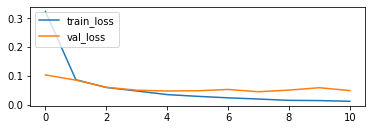

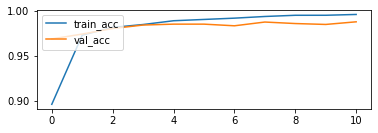

In [12]:
#plot loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

#plot accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()